In [6]:
import os, sys
import glob
import numpy as np
from astropy.table import Table, vstack, hstack, Column
import matplotlib.pyplot as plt
from matplotlib import patches
from astropy.coordinates import SkyCoord
import matplotlib.gridspec as gridspec
import seaborn as sns
import pandas as pd
import mpl_scatter_density

plt.style.use('mplstyle')

# Time New Roman font doesn't works in tiger, so I use STIXGeneral
plt.rcParams['font.family'] = 'STIXGeneral'

### Load astrom tab

In [7]:
astrom_tab_hsc = Table.read('../dr1_qa/astrometry/DR1_astrom_calib_gaia_hsc_9813.fits', 'HSC')
astrom_tab_gaia = Table.read('../dr1_qa/astrometry/DR1_astrom_calib_gaia_hsc_9813.fits', 'GAIA')

dra_gaia = astrom_tab_gaia['dra']
ddec_gaia = astrom_tab_gaia['ddec']
dra_median_gaia = astrom_tab_gaia.meta['dra_median']
ddec_median_gaia = astrom_tab_gaia.meta['ddec_median']

dra_hsc = astrom_tab_hsc['dra']
ddec_hsc = astrom_tab_hsc['ddec']
dra_median_hsc = astrom_tab_hsc.meta['dra_median']
ddec_median_hsc = astrom_tab_hsc.meta['ddec_median']

### Random tracts

In [8]:
random_tract = [8280,8525,8764,8769,9010,9078,9088,9099,9102,9131,9135,9227,9313,9319,9344,9378,9456,9459,9470,9556,9564,9574,9589,9798,9800,9812,9828,9939,9946,9953,10040,10048,10061,10183,10293,10427]

dra_median_gaia_array = []
ddec_median_gaia_array = []

dra_median_hsc_array = []
ddec_median_hsc_array = []

for tractnum in random_tract:
    try:
        astrom_tab_hsc = Table.read(f'../dr1_qa/astrometry/DR1_astrom_calib_gaia_hsc_{tractnum}.fits', 'HSC')
        astrom_tab_gaia = Table.read(f'../dr1_qa/astrometry/DR1_astrom_calib_gaia_hsc_{tractnum}.fits', 'GAIA')
    except:
        print(f'No astrometry for tract {tractnum}')
        continue

    dra_median_gaia_array = dra_median_gaia_array + astrom_tab_gaia['dra'].data.tolist()
    ddec_median_gaia_array = ddec_median_gaia_array + astrom_tab_gaia['ddec'].data.tolist()

    dra_median_hsc_array = dra_median_hsc_array + astrom_tab_hsc['dra'].data.tolist()
    ddec_median_hsc_array = ddec_median_hsc_array + astrom_tab_hsc['ddec'].data.tolist()


No astrometry for tract 9227


### Plot

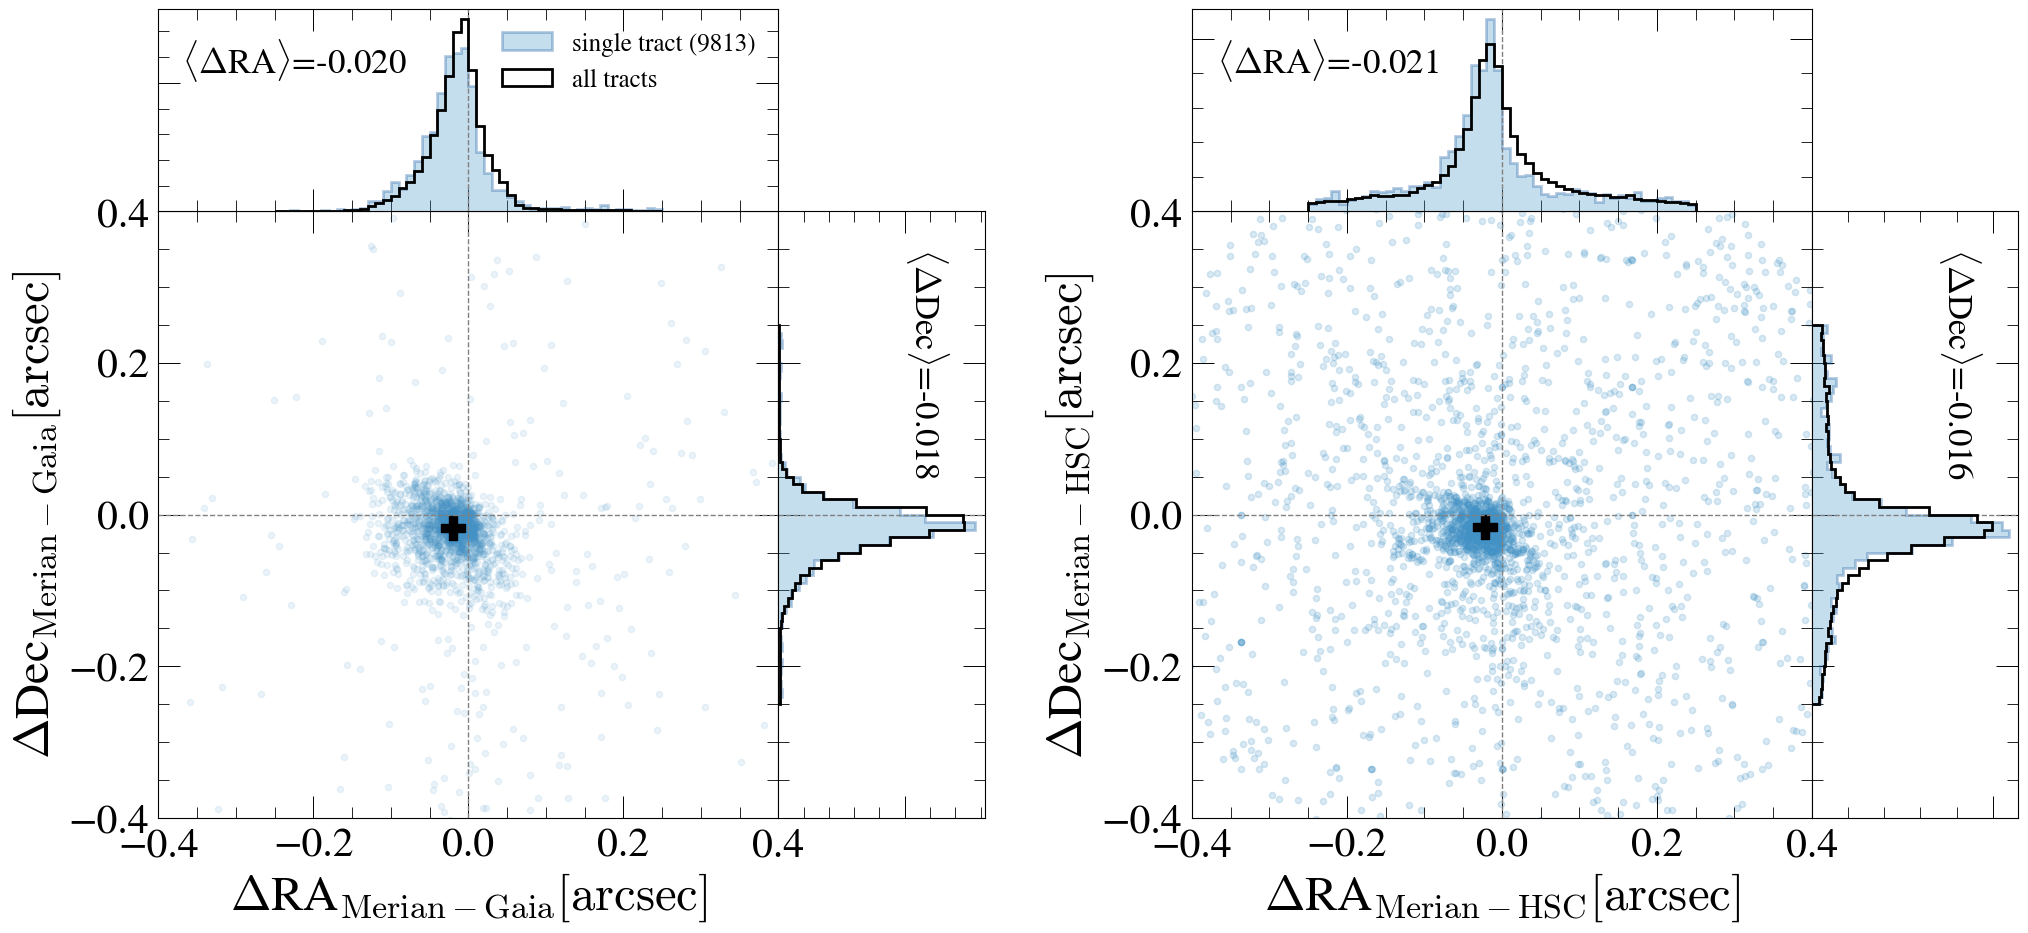

In [9]:
lim = 0.25
binwidth = 0.01

# plot

fig = plt.figure(figsize=(24,10.5))
gs = gridspec.GridSpec(4,9)

# LEFT PANEL
ax_main = plt.subplot(gs[1:4, :3])
ax_xDist = plt.subplot(gs[0, :3],sharex=ax_main)
ax_yDist = plt.subplot(gs[1:4, 3],sharey=ax_main)
ax_xDist.tick_params(axis='x', labelbottom=False, labelleft=False)
ax_yDist.tick_params(axis='y', labelbottom=False, labelleft=False)
ax_xDist.tick_params(axis='y', labelbottom=False, labelleft=False)
ax_yDist.tick_params(axis='x', labelbottom=False, labelleft=False)

bins = np.arange(-lim, lim + binwidth, binwidth)
ax_xDist.hist(dra_gaia, bins=bins, density=True, color='#4292c6', histtype='step',fill =True, alpha=0.3, lw=2, edgecolor='#08519c', label='single tract (9813)')
ax_yDist.hist(ddec_gaia, bins=bins, density=True, color='#4292c6', orientation='horizontal',align='mid', histtype='step', fill =True, alpha=0.3, lw=2, edgecolor='#08519c')
ax_xDist.axvline(x=0, ymin=0, ymax=1, color='grey', lw=1, ls='--')
ax_yDist.axhline(y=0, xmin=0, xmax=1, color='grey', lw=1, ls='--')
ax_xDist.text(0.22, 0.75, r'$\langle\Delta$RA$\rangle$=%.3f'%(dra_median_gaia), horizontalalignment='center', verticalalignment='center', transform=ax_xDist.transAxes, fontsize=25)
ax_yDist.text(0.72, 0.75, r'$\langle\Delta$Dec$\rangle$=%.3f'%(ddec_median_gaia), horizontalalignment='center', verticalalignment='center', transform=ax_yDist.transAxes, fontsize=25, rotation=270)
ax_xDist.hist(dra_median_gaia_array, bins=bins, histtype='step',fill=False, density=True, color='k', lw=2,  label='all tracts')
ax_yDist.hist(ddec_median_gaia_array, bins=bins, histtype='step',fill=False, density=True, color='k', lw=2, orientation='horizontal',align='mid')


ax_main.scatter(dra_gaia, ddec_gaia, color='#4292c6', alpha=0.1, s=20)
ax_main.scatter(dra_median_gaia, ddec_median_gaia, marker='P', s=300, color='k')
ax_main.axhline(y=0, xmin=0, xmax=1, color='grey', lw=1, ls='--')
ax_main.axvline(x=0, ymin=0, ymax=1, color='grey', lw=1, ls='--')
ax_main.set_xlim(-0.4,0.4)
ax_main.set_ylim(-0.4,0.4)
ax_main.set_xlabel(r'$\Delta$RA$_\mathrm{Merian-Gaia}[\mathrm{arcsec}]$')
ax_main.set_ylabel(r'$\Delta$Dec$_\mathrm{Merian-Gaia}[\mathrm{arcsec}]$')
# ax_main.text(0.13, 0.9, 'N708', horizontalalignment='center', verticalalignment='center', transform=ax_main.transAxes, fontsize=35)


# RIGHT PANEL
ax_main2 = plt.subplot(gs[1:4, 5:8])
ax_xDist2 = plt.subplot(gs[0, 5:8],sharex=ax_main)
ax_yDist2 = plt.subplot(gs[1:4, 8],sharey=ax_main)
ax_xDist2.tick_params(axis='x', labelbottom=False, labelleft=False)
ax_yDist2.tick_params(axis='y', labelbottom=False, labelleft=False)
ax_xDist2.tick_params(axis='y', labelbottom=False, labelleft=False)
ax_yDist2.tick_params(axis='x', labelbottom=False, labelleft=False)

ax_main2.scatter(dra_hsc, ddec_hsc, color='#4292c6', alpha=0.2, s=20)
ax_main2.scatter(dra_median_hsc, ddec_median_hsc, marker='P', s=300, color='k')
ax_main2.axhline(y=0, xmin=0, xmax=1, color='grey', lw=1, ls='--')
ax_main2.axvline(x=0, ymin=0, ymax=1, color='grey', lw=1, ls='--')
ax_main2.set_xlim(-0.4,0.4)
ax_main2.set_ylim(-0.4,0.4)
ax_main2.set_xlabel(r'$\Delta$RA$_\mathrm{Merian-HSC}[\mathrm{arcsec}]$')
ax_main2.set_ylabel(r'$\Delta$Dec$_\mathrm{Merian-HSC}[\mathrm{arcsec}]$')
# ax_main2.text(0.13, 0.9, 'N540', horizontalalignment='center', verticalalignment='center', transform=ax_main2.transAxes, fontsize=35)

ax_xDist2.hist(dra_hsc, bins=bins, color='#4292c6', histtype='step',fill =True, density=True, alpha=0.3, lw=2, edgecolor='#08519c')
ax_yDist2.hist(ddec_hsc, bins=bins, color='#4292c6', orientation='horizontal',align='mid', histtype='step', fill =True, density=True, alpha=0.3, lw=2, edgecolor='#08519c')
ax_xDist2.axvline(x=0, ymin=0, ymax=1, color='grey', lw=1, ls='--')
ax_yDist2.axhline(y=0, xmin=0, xmax=1, color='grey', lw=1, ls='--')
ax_xDist2.text(0.22, 0.75, r'$\langle\Delta$RA$\rangle$=%.3f'%(dra_median_hsc), horizontalalignment='center', verticalalignment='center', transform=ax_xDist2.transAxes, fontsize=25)
ax_yDist2.text(0.72, 0.75, r'$\langle\Delta$Dec$\rangle$=%.3f'%(ddec_median_hsc), horizontalalignment='center', verticalalignment='center', transform=ax_yDist2.transAxes, fontsize=25, rotation=270)
ax_xDist2.hist(dra_median_hsc_array, bins=bins, histtype='step',fill=False, density=True, color='k', lw=2)
ax_yDist2.hist(ddec_median_hsc_array, bins=bins, histtype='step',fill=False, density=True, color='k', lw=2, orientation='horizontal',align='mid')

ax_xDist.legend(loc='upper right', fontsize=18, frameon=False)

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('figures/astro_calib_tests_v20240404.jpeg', dpi=300, bbox_inches='tight')

### Statistics of random tracts -- OLD

In [10]:
# random_tract = [8280,8525,8764,8769,9010,9078,9088,9099,9102,9131,9135,9227,9313,9319,9344,9378,9456,9459,9470,9556,9564,9574,9589,9798,9800,9812,9828,9939,9946,9953,10040,10048,10061,10183,10293,10427]

# dra_median_gaia_array = []
# ddec_median_gaia_array = []

# dra_median_hsc_array = []
# ddec_median_hsc_array = []

# for tractnum in random_tract:
#     try:
#         astrom_tab_hsc = Table.read(f'../dr1_qa/astrometry/DR1_astrom_calib_gaia_hsc_{tractnum}.fits', 'HSC')
#         astrom_tab_gaia = Table.read(f'../dr1_qa/astrometry/DR1_astrom_calib_gaia_hsc_{tractnum}.fits', 'GAIA')
#     except:
#         print(f'No astrometry for tract {tractnum}')
#         continue

    
#     dra_median_gaia_array.append(astrom_tab_gaia.meta['dra_median'])
#     ddec_median_gaia_array.append(astrom_tab_gaia.meta['ddec_median'])

#     dra_median_hsc_array.append(astrom_tab_hsc.meta['dra_median'])
#     ddec_median_hsc_array.append(astrom_tab_hsc.meta['ddec_median'])

# dra_median_gaia = np.mean(dra_median_gaia_array)
# ddec_median_gaia = np.mean(ddec_median_gaia_array)

# dra_median_hsc = np.mean(dra_median_hsc_array)
# ddec_median_hsc = np.mean(ddec_median_hsc_array)


# lim = 0.05
# binwidth = 0.01

# # plot

# fig = plt.figure(figsize=(26,12))
# gs = gridspec.GridSpec(4,9)

# # LEFT PANEL
# ax_main = plt.subplot(gs[1:4, :3])
# ax_xDist = plt.subplot(gs[0, :3],sharex=ax_main)
# ax_yDist = plt.subplot(gs[1:4, 3],sharey=ax_main)
# ax_xDist.tick_params(axis='x', labelbottom=False, labelleft=False)
# ax_yDist.tick_params(axis='y', labelbottom=False, labelleft=False)
# ax_xDist.tick_params(axis='y', labelbottom=False, labelleft=False)
# ax_yDist.tick_params(axis='x', labelbottom=False, labelleft=False)

# bins = np.arange(-lim, lim + binwidth, binwidth)
# ax_xDist.hist(dra_median_gaia_array, bins=bins, color='red', histtype='step',fill =True, alpha=0.2, lw=1)
# ax_yDist.hist(ddec_median_gaia_array, bins=bins, color='red', orientation='horizontal',align='mid', histtype='step', fill=True, alpha=0.2, lw=1)
# ax_xDist.axvline(x=0, ymin=0, ymax=1, color='grey', lw=1, ls='--')
# ax_yDist.axhline(y=0, xmin=0, xmax=1, color='grey', lw=1, ls='--')
# ax_xDist.text(0.16, 0.8, r'$\langle\Delta$RA$\rangle$=%.3f'%(dra_median_gaia), horizontalalignment='center', verticalalignment='center', transform=ax_xDist.transAxes, fontsize=25)
# ax_yDist.text(0.5, 0.93, r'$\langle\Delta$Dec$\rangle$=%.3f'%(ddec_median_gaia), horizontalalignment='center', verticalalignment='center', transform=ax_yDist.transAxes, fontsize=25)

# ax_main.scatter(dra_median_gaia_array, ddec_median_gaia_array, color='r', alpha=0.2)
# ax_main.scatter(dra_median_gaia, ddec_median_gaia, marker='P', s=300, color='k')
# ax_main.axhline(y=0, xmin=0, xmax=1, color='grey', lw=1, ls='--')
# ax_main.axvline(x=0, ymin=0, ymax=1, color='grey', lw=1, ls='--')
# ax_main.set_xlim(-0.075,0.075)
# ax_main.set_ylim(-0.075,0.075)
# ax_main.set_xlabel(r'$\Delta$RA$_\mathrm{Merian-GAIA}$')
# ax_main.set_ylabel(r'$\Delta$Dec$_\mathrm{Merian-GAIA}$')
# # ax_main.text(0.13, 0.9, 'N708', horizontalalignment='center', verticalalignment='center', transform=ax_main.transAxes, fontsize=35)


# # RIGHT PANEL
# ax_main2 = plt.subplot(gs[1:4, 5:8])
# ax_xDist2 = plt.subplot(gs[0, 5:8],sharex=ax_main)
# ax_yDist2 = plt.subplot(gs[1:4, 8],sharey=ax_main)
# ax_xDist2.tick_params(axis='x', labelbottom=False, labelleft=False)
# ax_yDist2.tick_params(axis='y', labelbottom=False, labelleft=False)
# ax_xDist2.tick_params(axis='y', labelbottom=False, labelleft=False)
# ax_yDist2.tick_params(axis='x', labelbottom=False, labelleft=False)

# ax_main2.scatter(dra_median_hsc_array, ddec_median_hsc_array, color='g', alpha=0.2)
# ax_main2.scatter(dra_median_hsc, ddec_median_hsc, marker='P', s=300, color='k')
# ax_main2.axhline(y=0, xmin=0, xmax=1, color='grey', lw=1, ls='--')
# ax_main2.axvline(x=0, ymin=0, ymax=1, color='grey', lw=1, ls='--')
# ax_main2.set_xlim(-0.075,0.075)
# ax_main2.set_ylim(-0.075,0.075)
# ax_main2.set_xlabel(r'$\Delta$RA$_\mathrm{Merian-HSC}$')
# ax_main2.set_ylabel(r'$\Delta$Dec$_\mathrm{Merian-HSC}$')
# # ax_main2.text(0.13, 0.9, 'N540', horizontalalignment='center', verticalalignment='center', transform=ax_main2.transAxes, fontsize=35)

# ax_xDist2.hist(dra_median_hsc_array, bins=bins, color='g', histtype='step',fill =True, alpha=0.2, lw=1)
# ax_yDist2.hist(ddec_median_hsc_array, bins=bins, color='g', orientation='horizontal',align='mid', histtype='step', fill=True, alpha=0.2, lw=1)
# ax_xDist2.axvline(x=0, ymin=0, ymax=1, color='grey', lw=1, ls='--')
# ax_yDist2.axhline(y=0, xmin=0, xmax=1, color='grey', lw=1, ls='--')
# ax_xDist2.text(0.16, 0.8, r'$\langle\Delta$RA$\rangle$=%.3f'%(dra_median_hsc), horizontalalignment='center', verticalalignment='center', transform=ax_xDist2.transAxes, fontsize=25)
# ax_yDist2.text(0.5, 0.93, r'$\langle\Delta$Dec$\rangle$=%.3f'%(ddec_median_hsc), horizontalalignment='center', verticalalignment='center', transform=ax_yDist2.transAxes, fontsize=25)


# plt.subplots_adjust(wspace=0, hspace=0)
# _ = fig.suptitle('Statistics of random tracts', fontsize=40, fontweight='bold')